<a href="https://colab.research.google.com/github/RubenCedillo123/Machine-Learning/blob/main/Clase_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Paqueterias

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Trabajo

In [ ]:
import pandas as pd
cancer = load_breast_cancer()
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target
target_labels = cancer.target[[10, 20, 30]]
print("labels:", target_labels)
print("clase:", cancer.target_names[target_labels])


labels: [0 1 0]
clase: ['malignant' 'benign' 'malignant']


In [ ]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [ ]:
correlation = df.corr()
correlation_target = correlation['target']
correlation_absolute = correlation_target.abs()
correlation_sorted = correlation_absolute.sort_values(ascending=False)

In [ ]:
correlation_sorted

,target
target,1.000000
worst concave points,0.793566
worst perimeter,0.782914
mean concave points,0.776614
worst radius,0.776454
mean perimeter,0.742636
worst area,0.733825
mean radius,0.730029
mean area,0.708984
mean concavity,0.696360


In [ ]:
umbral_wc = 0.1251
df['prediction_wcp'] = (df['worst concave points'] >= umbral_wc).astype(int)
cm_wc = confusion_matrix(df['target'], df['prediction_wcp'])
print(round(accuracy_score(df['target'], df['prediction_wcp']), 4))
print(round(precision_score(df['target'], df['prediction_wcp']), 4))
print(round(recall_score(df['target'], df['prediction_wcp']), 4))
print(round(f1_score(df['target'], df['prediction_wcp']), 4))

0.1002
0.1525
0.0952
0.1172


In [ ]:
umbral_wc = 0.1251
df['prediction_wcp'] = (df['worst concave points'] <= umbral_wc).astype(int)
cm_wc = confusion_matrix(df['target'], df['prediction_wcp'])
print("Accuracy:", round(accuracy_score(df['target'], df['prediction_wcp']), 4))
print("Precision" ,round(precision_score(df['target'], df['prediction_wcp']), 4))
print("Recall:", round(recall_score(df['target'], df['prediction_wcp']), 4))
print("F1_Score:", round(f1_score(df['target'], df['prediction_wcp']), 4))

Accuracy: 0.9033
Precision 0.9339
Recall: 0.9104
F1_Score: 0.922


In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer(as_frame=True)
df = cancer.frame
X = df[cancer['feature_names']]
print(X)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [ ]:
X_mean = X.mean()
X_std = X.std()
Z = (X - X_mean) / X_std

In [ ]:
Z

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.109139,0.720838,2.058974,2.341795,1.040926,0.218868,1.945573,2.318924,-0.312314,-0.930209,...,1.899514,0.117596,1.751022,2.013529,0.378033,-0.273077,0.663928,1.627719,-1.358963,-0.708467
565,1.703356,2.083301,1.614511,1.722326,0.102368,-0.017817,0.692434,1.262558,-0.217473,-1.057681,...,1.535369,2.045599,1.420690,1.493644,-0.690623,-0.394473,0.236365,0.733182,-0.531387,-0.973122
566,0.701667,2.043775,0.672084,0.577445,-0.839745,-0.038646,0.046547,0.105684,-0.808406,-0.894800,...,0.560868,1.373645,0.578492,0.427529,-0.808876,0.350427,0.326479,0.413705,-1.103578,-0.318129
567,1.836725,2.334403,1.980781,1.733693,1.524426,3.269267,3.294046,2.656528,2.135315,1.042778,...,1.959515,2.235958,2.301575,1.651717,1.429169,3.901415,3.194794,2.287972,1.917396,2.217684


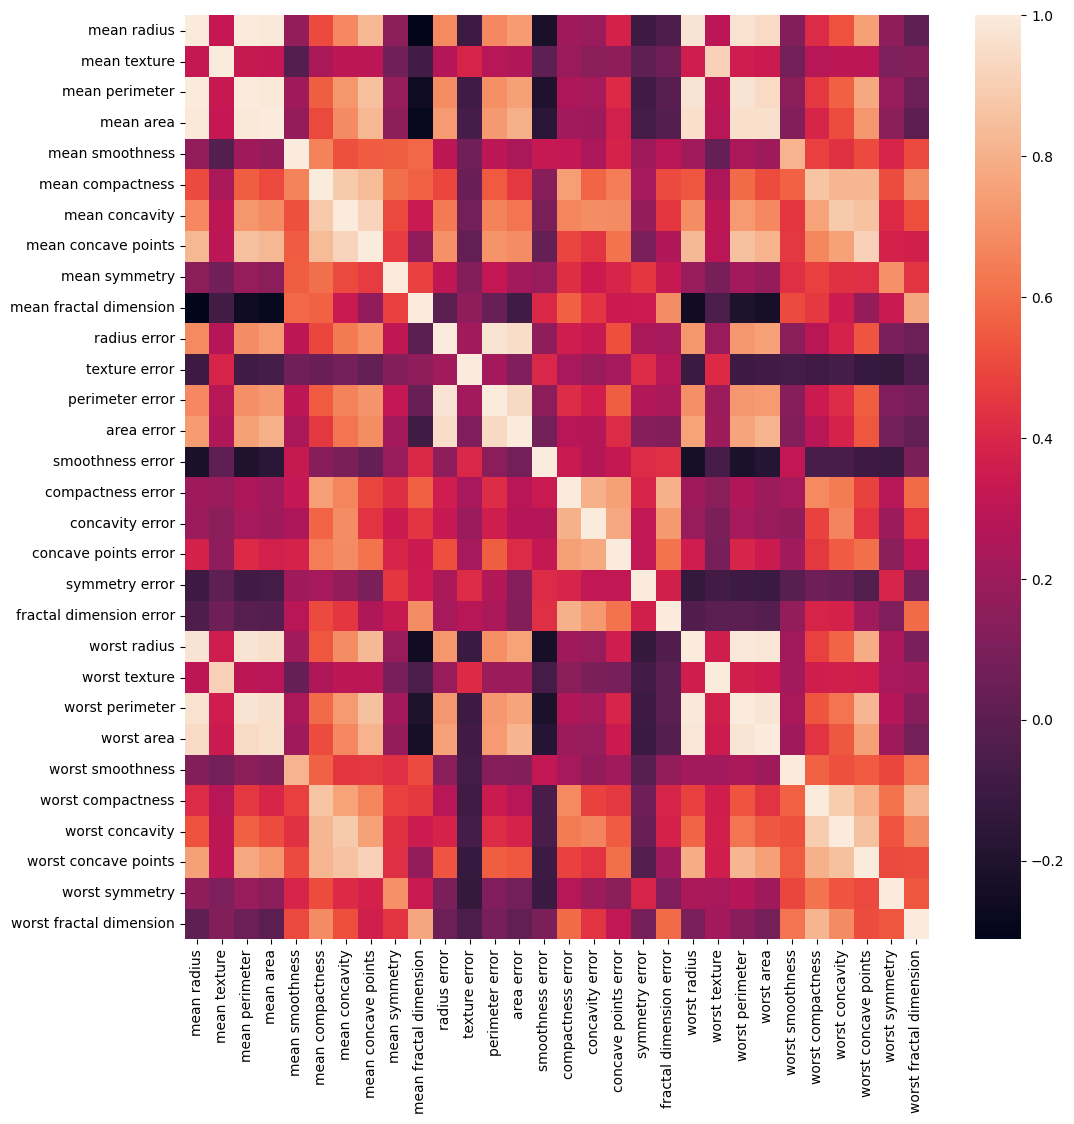

In [ ]:
c = Z.cov()
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 12))
sns.heatmap(c)
plt.show()
#1 contienen la misma informacion

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(c)
print('Valores propios:\n', eigenvalues)
print('Forma de los valores propios:', eigenvalues.shape)
print('Forma de los vectores propios:', eigenvectors.shape)


Valores propios:
 [1.32816077e+01 5.69135461e+00 2.81794898e+00 1.98064047e+00
 1.64873055e+00 1.20735661e+00 6.75220114e-01 4.76617140e-01
 4.16894812e-01 3.50693457e-01 2.93915696e-01 2.61161370e-01
 2.41357496e-01 1.57009724e-01 9.41349650e-02 7.98628010e-02
 5.93990378e-02 5.26187835e-02 4.94775918e-02 1.33044823e-04
 7.48803097e-04 1.58933787e-03 6.90046388e-03 8.17763986e-03
 1.54812714e-02 1.80550070e-02 2.43408378e-02 2.74394025e-02
 3.11594025e-02 2.99728939e-02]
Forma de los valores propios: (30,)
Forma de los vectores propios: (30, 30)


In [ ]:
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

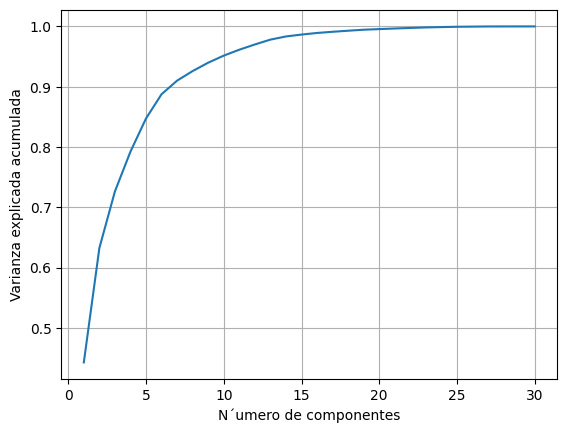

In [ ]:
explained_var = np.cumsum(eigenvalues) / np.sum(eigenvalues)
plt.plot(range(1, len(explained_var) + 1), explained_var)
plt.xlabel("N´umero de componentes")
plt.ylabel("Varianza explicada acumulada")
plt.grid()
plt.show()

#30 pq es estandarizado

In [ ]:
normal = np.cumsum(eigenvalues) / np.sum(eigenvalues)
normal

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881,
       0.961366  , 0.97007138, 0.97811663, 0.98335029, 0.98648812,
       0.98915022, 0.99113018, 0.99288414, 0.9945334 , 0.99557204,
       0.99657114, 0.99748579, 0.99829715, 0.99889898, 0.99941502,
       0.99968761, 0.99991763, 0.99997061, 0.99999557, 1.        ])

In [ ]:
n_components = np.argmax(explained_var >= 0.50) + 1
print(n_components)

2


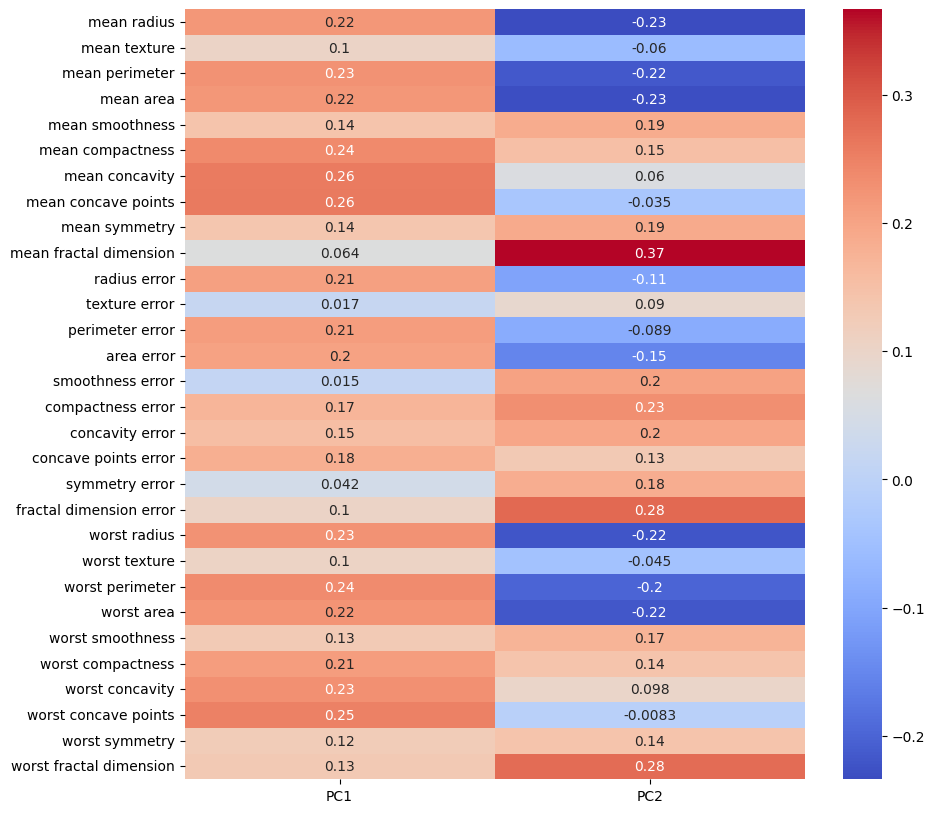

In [ ]:
u = eigenvectors[:, :n_components]
pca_component = pd.DataFrame(u, index = cancer['feature_names'], columns = ['PC1', 'PC2'])
plt.figure(figsize =(10, 10))
sns.heatmap(pca_component, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
Z_pca = Z @ pca_component
Z_pca.columns = ['PCA1', 'PCA2']
print(Z_pca)

          PCA1       PCA2
0     9.184755   1.946870
1     2.385703  -3.764859
2     5.728855  -1.074229
3     7.116691  10.266556
4     3.931842  -1.946359
..         ...        ...
564   6.433655  -3.573673
565   3.790048  -3.580897
566   1.255075  -1.900624
567  10.365673   1.670540
568  -5.470430  -0.670047

[569 rows x 2 columns]


In [ ]:
minmax_s = MinMaxScaler()
Z_pca[['PCA1', 'PCA2']] = minmax_s.fit_transform(Z_pca[['PCA1', 'PCA2']])
print(Z_pca)

         PCA1      PCA2
0    0.674370  0.477882
1    0.363425  0.196947
2    0.516319  0.329287
3    0.579790  0.887090
4    0.434135  0.286391
..        ...       ...
564  0.548552  0.206350
565  0.427651  0.205995
566  0.311717  0.288640
567  0.728378  0.464290
568  0.004135  0.349167

[569 rows x 2 columns]


In [ ]:
zscore_s = StandardScaler()
Z_pca[['PCA1', 'PCA2']] = zscore_s.fit_transform(Z_pca[['PCA1', 'PCA2']])
print(Z_pca)

         PCA1      PCA2
0    2.522460  0.816791
1    0.655199 -1.579512
2    1.573347 -0.450683
3    1.954496  4.307238
4    1.079823 -0.816577
..        ...       ...
564  1.766910 -1.499301
565  1.040882 -1.502332
566  0.344688 -0.797389
567  2.846782  0.700860
568 -1.502374 -0.281112

[569 rows x 2 columns]


In [ ]:
print(Z_pca[['PCA1', 'PCA2']].corr())

              PCA1          PCA2
PCA1  1.000000e+00  2.309225e-16
PCA2  2.309225e-16  1.000000e+00


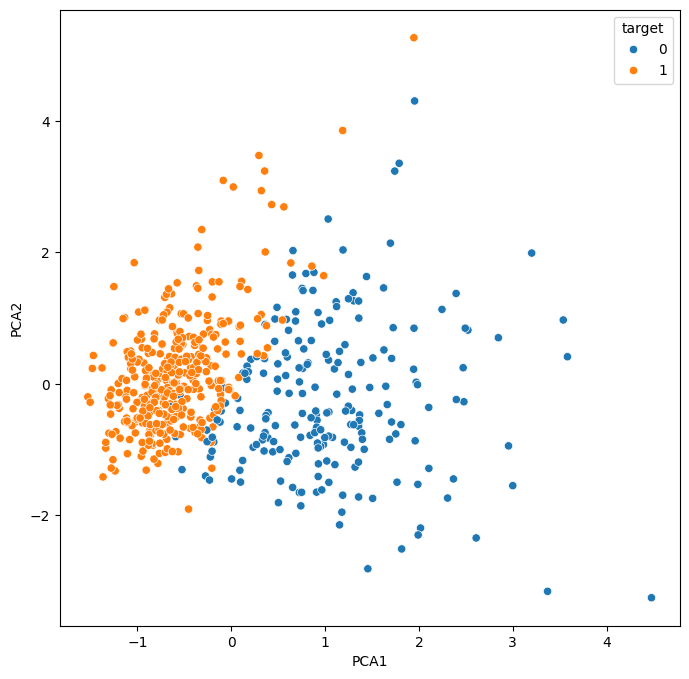

In [ ]:
Z_pca['target'] = df['target']
plt.figure(figsize=(8,8))
sns.scatterplot(data=Z_pca, x="PCA1", y="PCA2", hue="target")
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [ ]:
umbral1 = Z_pca[Z_pca['target'] == 0]['PCA1'].median()
umbral2 = Z_pca[Z_pca['target'] == 0]['PCA2'].median()
Z_pca['pred_pca'] = ((Z_pca['PCA1'] >= umbral1)
| (Z_pca['PCA2'] >= umbral2)).astype(int)
cm_pca12 = confusion_matrix(Z_pca['target'], Z_pca['pred_pca'])
print(accuracy_score(Z_pca['target'], Z_pca['pred_pca']))

0.5588752196836555


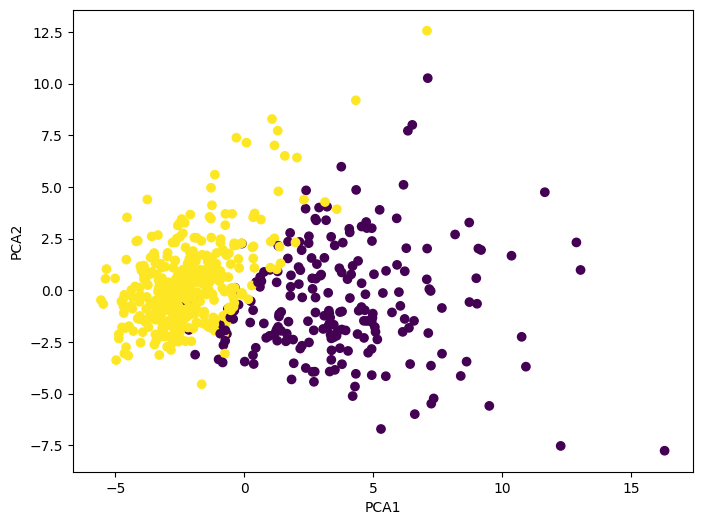

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(Z)
x_pca = pca.transform(Z)
df_pca1 = pd.DataFrame(x_pca,
columns=['PC{}'.format(i+1)
for i in range(n_components)])
plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=cancer['target'])
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()


In [ ]:
umbral1=0
umbral2=0
Z_pca['pred_pca'] = ((Z_pca['PCA1'] <= umbral1)
| (Z_pca['PCA2'] >= umbral2)).astype(int)
cm_pca12 = confusion_matrix(Z_pca['target'], Z_pca['pred_pca'])
print(accuracy_score(Z_pca['target'], Z_pca['pred_pca']))

0.8242530755711776


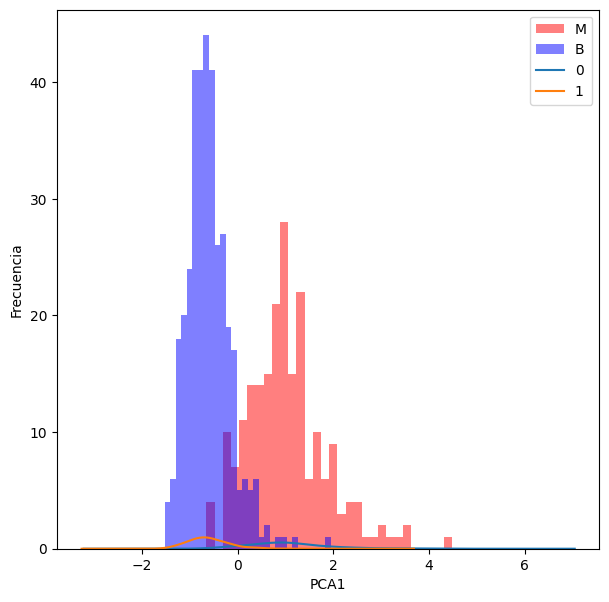

In [ ]:
benigno = Z_pca[Z_pca['target'] == 1] # Clase 'Benigno'
maligno = Z_pca[Z_pca['target'] == 0] # Clase 'Maligno'

plt.figure(figsize=(7, 7))
plt.hist(maligno['PCA1'], alpha=0.5, label='M', color='red', bins=30)
plt.hist(benigno['PCA1'], alpha=0.5, label='B', color='blue', bins=30)
Z_pca.groupby('target')['PCA1'].plot(kind='kde')
plt.xlabel('PCA1')
plt.ylabel('Frecuencia')
plt.legend(loc='upper right')
plt.show()

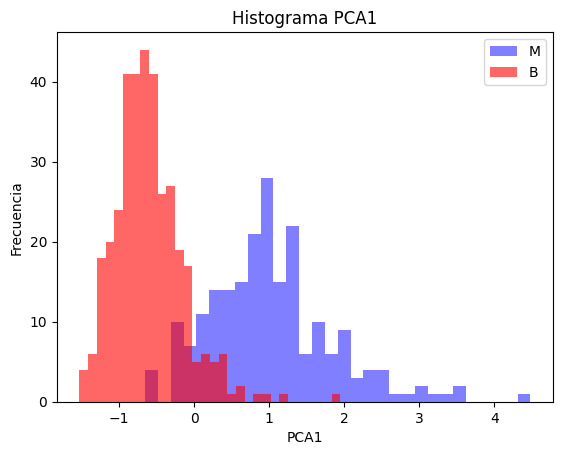

In [ ]:
#creo dos "clases"
maligno = Z_pca[Z_pca['target'] == 0]
benigno = Z_pca[Z_pca['target'] == 1]

#Histograma para cada variable escogida.
for variable in ['PCA1']:
  plt.hist(maligno[variable], alpha=0.5, label='M', color='blue', bins=30)
  plt.hist(benigno[variable], alpha=0.6, label='B', color='red', bins=30)
  plt.xlabel(variable)
  plt.ylabel('Frecuencia')
  plt.title('Histograma {}' .format(variable))
  plt.legend(loc='upper right')
  plt.show()

* Hay dos variables independientes
* Hay tres tergets

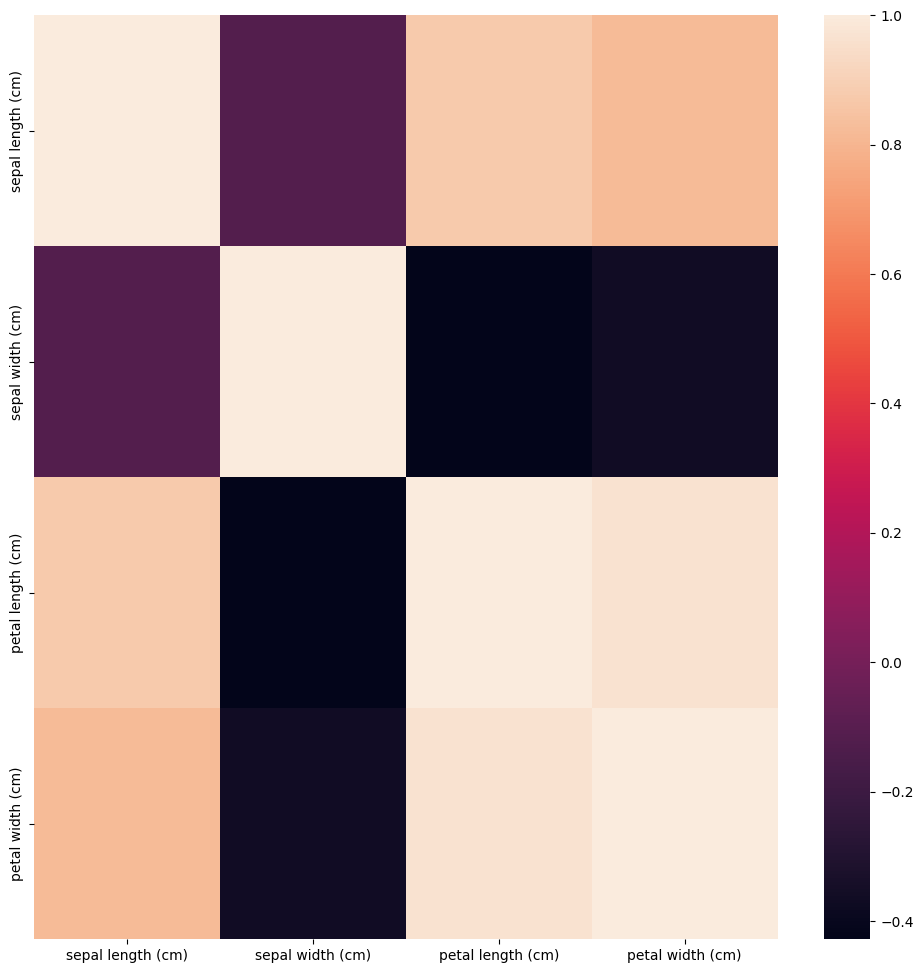

Valores propios:
 [2.91849782 0.91403047 0.14675688 0.02071484]
Forma de los valores propios: (4,)
Forma de los vectores propios: (4, 4)


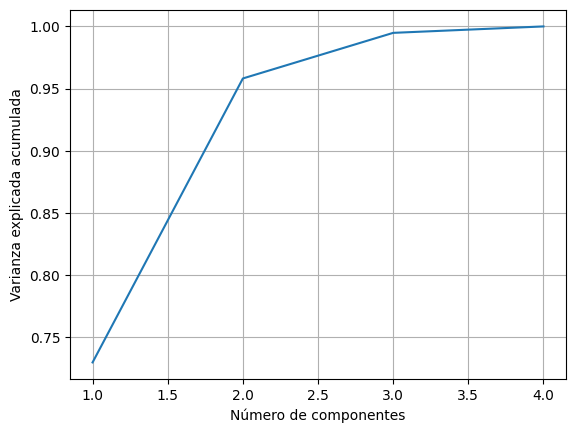

Número de componentes seleccionados: 2


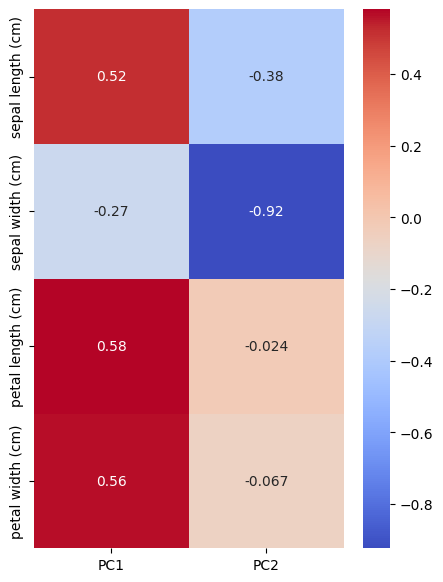

         PCA1      PCA2
0   -2.257141 -0.478424
1   -2.074013  0.671883
2   -2.356335  0.340766
3   -2.291707  0.595400
4   -2.381863 -0.644676
..        ...       ...
145  1.864258 -0.385674
146  1.559356  0.893693
147  1.516091 -0.268171
148  1.368204 -1.007878
149  0.957448  0.024250

[150 rows x 2 columns]


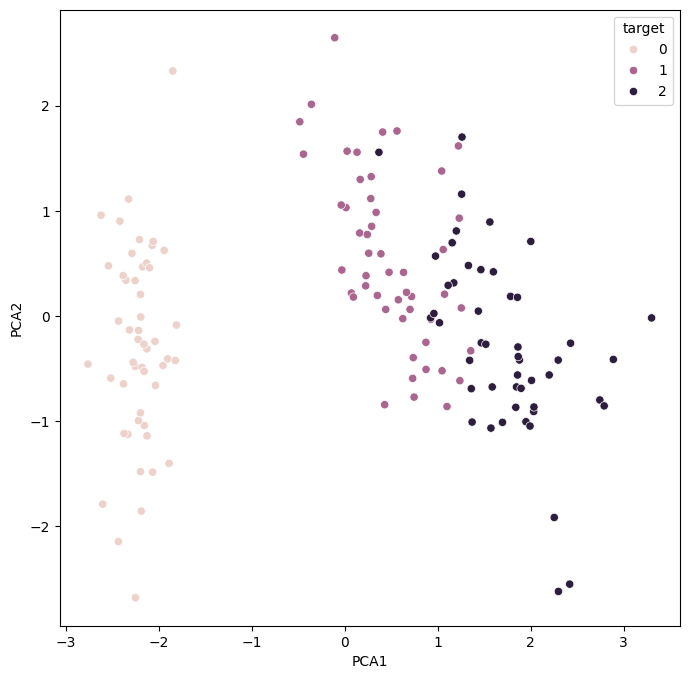

In [ ]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset Iris
iris = load_iris(as_frame=True)
df = iris.frame
X = df[iris['feature_names']]

# Paso 1: Estandarizar los datos
X_mean = X.mean()
X_std = X.std()
Z = (X - X_mean) / X_std

# Paso 2: Calcular la matriz de covarianza
c = Z.cov()
plt.figure(figsize=(12, 12))
sns.heatmap(c)
plt.show()

# Paso 3: Calcular los valores propios y los vectores propios
eigenvalues, eigenvectors = np.linalg.eig(c)
print('Valores propios:\n', eigenvalues)
print('Forma de los valores propios:', eigenvalues.shape)
print('Forma de los vectores propios:', eigenvectors.shape)

# Paso 4: Ordenar los valores propios en orden descendente y reorganizar los vectores propios
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Paso 5: Calcular la varianza explicada acumulada
explained_var = np.cumsum(eigenvalues) / np.sum(eigenvalues)
plt.plot(range(1, len(explained_var) + 1), explained_var)
plt.xlabel("Número de componentes")
plt.ylabel("Varianza explicada acumulada")
plt.grid()
plt.show()

# Paso 6: Determinar el número de componentes principales
n_components = np.argmax(explained_var >= 0.90) + 1  # Aquí consideramos 90% de varianza explicada
print("Número de componentes seleccionados:", n_components)

# Paso 7: Proyectar los datos en los componentes principales
u = eigenvectors[:, :n_components]
pca_component = pd.DataFrame(u, index=iris['feature_names'], columns=[f'PC{i+1}' for i in range(n_components)])

# Visualización de los componentes principales
plt.figure(figsize=(5, 7))
sns.heatmap(pca_component, annot=True, cmap='coolwarm')
plt.show()

# Paso 8: Proyectar los datos en el nuevo espacio de componentes principales
Z_pca = Z @ pca_component
Z_pca.columns = [f'PCA{i+1}' for i in range(n_components)]
print(Z_pca)

# Paso 9: Graficar los componentes principales y visualizar la separación de las clases
Z_pca['target'] = df['target']
plt.figure(figsize=(8, 8))
sns.scatterplot(data=Z_pca, x="PCA1", y="PCA2", hue="target")
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()
